<a href="https://colab.research.google.com/github/HPCL/roofline_python/blob/main/roofline_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import io
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
import plotly.graph_objects as go

## google colab users: you can run the next code cell (and comment out the jupyter code cell that is after)
## jupyter notebook users do the opposite

### change the file name to upload the json file that you want.


In [3]:
# GOOGLE COLAB
# Load the json file
from google.colab import files
uploaded = files.upload()

# Load 
filename = "roofline.json"
data = json.loads(uploaded[filename].decode("utf-8"))
data

Saving roofline.json to roofline.json


{'empirical': {'gbytes': {'data': [['L1', 5371.68],
    ['L2', 3025.18],
    ['DRAM', 196.82]],
   'metadata': {'': ['FLOPS          2',
     'OPENMP_THREADS 40',
     'ERT_VERSION  1.1.0',
     'TIMESTAMP_DATA  1611254535.89',
     "HOSTNAME  ('apollo.cs.uoregon.edu', [], ['128.223.8.36'])",
     "UNAME  ('Linux', 'apollo', '4.15.0-88-generic', '#88-Ubuntu SMP Tue Feb 11 20:11:34 UTC 2020', 'x86_64', 'x86_64')",
     "CONFIG  {'ERT_WORKING_SET_MIN': ['1'], 'ERT_CFLAGS': ['-O3', '-march=skylake-avx512'], 'ERT_CC': ['g++'], 'ERT_WSS_MULT': [1.1], 'ERT_HIP': [False], 'ERT_MPI_CFLAGS': [], 'ERT_MPI_LDFLAGS': [], 'ERT_MEMORY_MAX': ['2147482548'], 'ERT_PROCS_THREADS': ['112'], 'ERT_LDFLAGS': [], 'ERT_LDLIBS': [], 'ERT_RUN': ['export', 'OMP_NUM_THREADS=ERT_OPENMP_THREADS;', 'export', 'OMP_PLACES=threads;', 'export', 'OMP_PROC_BIND=spread;', './ERT_CODE'], 'ERT_OCL': [False], 'ERT_FLOPS': ['1,2,4,8,16,32,64,128'], 'ERT_OPENMP_CFLAGS': ['-fopenmp'], 'ERT_SYCL': [False], 'ERT_MPI': ['False'], '

In [ ]:
# JUPYTER NOTEBOOK
# filename = "roofline.json"
# data = json.loads(filename)
# data

## Run all below to automatically decode json and create a roofline plot.

In [4]:
# Parse the gbytes section
gbytes = data['empirical']['gbytes']
gbytes

{'data': [['L1', 5371.68], ['L2', 3025.18], ['DRAM', 196.82]],
 'metadata': {'': ['FLOPS          2',
   'OPENMP_THREADS 40',
   'ERT_VERSION  1.1.0',
   'TIMESTAMP_DATA  1611254535.89',
   "HOSTNAME  ('apollo.cs.uoregon.edu', [], ['128.223.8.36'])",
   "UNAME  ('Linux', 'apollo', '4.15.0-88-generic', '#88-Ubuntu SMP Tue Feb 11 20:11:34 UTC 2020', 'x86_64', 'x86_64')",
   "CONFIG  {'ERT_WORKING_SET_MIN': ['1'], 'ERT_CFLAGS': ['-O3', '-march=skylake-avx512'], 'ERT_CC': ['g++'], 'ERT_WSS_MULT': [1.1], 'ERT_HIP': [False], 'ERT_MPI_CFLAGS': [], 'ERT_MPI_LDFLAGS': [], 'ERT_MEMORY_MAX': ['2147482548'], 'ERT_PROCS_THREADS': ['112'], 'ERT_LDFLAGS': [], 'ERT_LDLIBS': [], 'ERT_RUN': ['export', 'OMP_NUM_THREADS=ERT_OPENMP_THREADS;', 'export', 'OMP_PLACES=threads;', 'export', 'OMP_PROC_BIND=spread;', './ERT_CODE'], 'ERT_OCL': [False], 'ERT_FLOPS': ['1,2,4,8,16,32,64,128'], 'ERT_OPENMP_CFLAGS': ['-fopenmp'], 'ERT_SYCL': [False], 'ERT_MPI': ['False'], 'ERT_TRIALS_MIN': ['1'], 'ERT_DRIVER': ['driver1

In [5]:
# Load gbytes data into Pandas dataframe
gbytes_df = pd.DataFrame(gbytes['data'], columns=['name', 'slope'])
gbytes_df['slope'] = gbytes_df['slope'] 
# Add the default x and y intercept
gbytes_df['x'] = 0
gbytes_df['y'] = 0
gbytes_df

,name,slope,x,y
0,L1,5371.68,0,0
1,L2,3025.18,0,0
2,DRAM,196.82,0,0


In [6]:
# Parse the gflop data section
gflops = data['empirical']['gflops']
gflops

{'data': [['FP64 GFLOPs', 2038.8]],
 'metadata': {'': ['META_DATA',
   'FLOPS          64',
   'OPENMP_THREADS 96',
   'ERT_VERSION  1.1.0',
   'TIMESTAMP_DATA  1611282082.69',
   "HOSTNAME  ('apollo.cs.uoregon.edu', [], ['128.223.8.36'])",
   "UNAME  ('Linux', 'apollo', '4.15.0-88-generic', '#88-Ubuntu SMP Tue Feb 11 20:11:34 UTC 2020', 'x86_64', 'x86_64')",
   "CONFIG  {'ERT_WORKING_SET_MIN': ['1'], 'ERT_CFLAGS': ['-O3', '-march=skylake-avx512'], 'ERT_CC': ['g++'], 'ERT_WSS_MULT': [1.1], 'ERT_HIP': [False], 'ERT_MPI_CFLAGS': [], 'ERT_MPI_LDFLAGS': [], 'ERT_MEMORY_MAX': ['2147482548'], 'ERT_PROCS_THREADS': ['112'], 'ERT_LDFLAGS': [], 'ERT_LDLIBS': [], 'ERT_RUN': ['export', 'OMP_NUM_THREADS=ERT_OPENMP_THREADS;', 'export', 'OMP_PLACES=threads;', 'export', 'OMP_PROC_BIND=spread;', './ERT_CODE'], 'ERT_OCL': [False], 'ERT_FLOPS': ['1,2,4,8,16,32,64,128'], 'ERT_OPENMP_CFLAGS': ['-fopenmp'], 'ERT_SYCL': [False], 'ERT_MPI': ['False'], 'ERT_TRIALS_MIN': ['1'], 'ERT_DRIVER': ['driver1'], 'ERT_R

In [7]:
# Load gflops data into a Pandas dataframe
gflops_df = pd.DataFrame(gflops['data'], columns=['name', 'y'])
# Add the default x intercept and "slope" (really the value)
gflops_df['x'] = 100
gflops_df['slope'] = gflops['data'][0][1]
gflops_df

,name,y,x,slope
0,FP64 GFLOPs,2038.8,100,2038.8


In [8]:
# Calculate the point where each memory line meets the peak line, add to dataframe
# y=mx+b -> x = (y-b)/m = (y-0)/m = y/m
rows = len(gbytes_df)
peak = gflops_df['y'][0]
new_xes = []

for row in range(rows):
  name = gbytes_df['name'][row]
  x = peak / gbytes_df['slope'][row]
  gbytes_df.loc[len(gbytes_df.index)] = [name, gbytes_df['slope'][row], x, peak]
  new_xes.append(x)

gbytes_df

,name,slope,x,y
0,L1,5371.68,0.000000,0.0
1,L2,3025.18,0.000000,0.0
2,DRAM,196.82,0.000000,0.0
3,L1,5371.68,0.379546,2038.8
4,L2,3025.18,0.673943,2038.8
5,DRAM,196.82,10.358703,2038.8


In [9]:
# Find the x coordinate to start the peak line at
peak_x_min = min(new_xes)
gflops_df.loc[len(gflops_df)] = [gflops_df['name'][0], gflops_df['y'][0], peak_x_min, gflops_df['y'][0]]

In [10]:
# Make the label columns for the graph
gbytes_df['label'] = gbytes_df['name'] + ' ' + gbytes_df['slope'].astype(str) + ' ' + 'GB/s'
gflops_df['label'] = gflops_df['name'] + ' ' + gflops_df['slope'].astype(str) + ' ' + 'GFLOPs/s'


In [11]:
# Concatenate the gbyte and gflop data into one dataframe to plot
g_df = pd.concat([gflops_df, gbytes_df], ignore_index=True)
g_df

,name,y,x,slope,label
0,FP64 GFLOPs,2038.8,100.000000,2038.80,FP64 GFLOPs 2038.8 GFLOPs/s
1,FP64 GFLOPs,2038.8,0.379546,2038.80,FP64 GFLOPs 2038.8 GFLOPs/s
2,L1,0.0,0.000000,5371.68,L1 5371.68 GB/s
3,L2,0.0,0.000000,3025.18,L2 3025.18 GB/s
4,DRAM,0.0,0.000000,196.82,DRAM 196.82 GB/s
5,L1,2038.8,0.379546,5371.68,L1 5371.68 GB/s
6,L2,2038.8,0.673943,3025.18,L2 3025.18 GB/s
7,DRAM,2038.8,10.358703,196.82,DRAM 196.82 GB/s


In [12]:
# Not working yet - trying to load more config data into a table to display next to the plot...
# print(type(gbytes['metadata']['']))
# config_str = gbytes['metadata'][''][6]
# print(config_str[8:])
# config = json.loads(config_str[8:])
# config
# config = [x for x in config if 'CONFIG'.]
# Load metadata into a Pandas dataframe
# metadata = pd.DataFrame(config, columns=metadata.keys())
# metadata.keys()

## plot roofline without application points - using seaborn/matplotlib

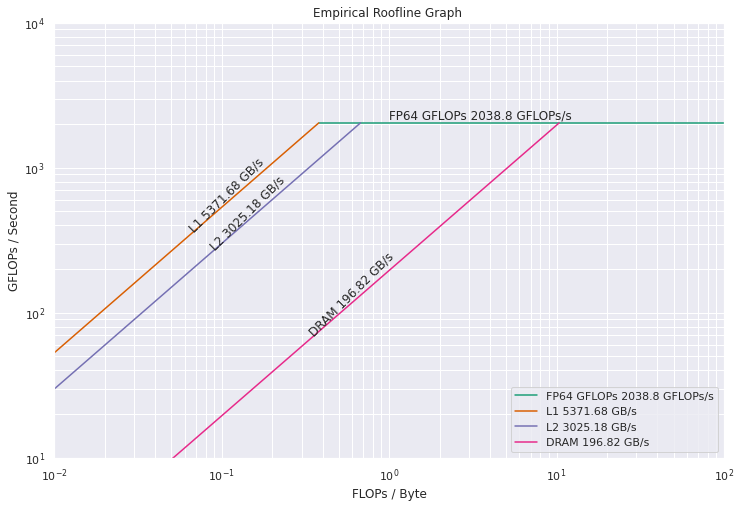

In [27]:
# calculate the axes scale
xmin =   0.01
xmax = 100.00
ymin = 10 # default
ymin = 10 ** int(math.floor(math.log10(g_df['slope'][0]*xmin)))
ymax = ymin ** int(math.floor(math.log10(g_df['slope'][0]*10)))

#calculate the midpoints for labels
xmid = math.sqrt(xmin * xmax)
ymid = g_df['slope'][0] * xmid
y0gbytes = ymid
x0gbytes = y0gbytes/g_df['slope'][0]
alpha = 1.065

# set some general plot settings
title = "Empirical Roofline Graph "
sns.set(rc={'figure.figsize':(12,8)})
palette = sns.color_palette( "Dark2", int(len(g_df)/2))

# plot the lines and peak flop label
ax = sns.lineplot(data=g_df, x="x", y="y", hue="label",palette=palette)
ax.set(xlabel='FLOPs / Byte', ylabel='GFLOPs / Second')
ax.set(xscale="log", yscale="log", xlim=(xmin, xmax), ylim=(ymin,ymax))

# plot the line label(s)
ax.text(x0gbytes, y0gbytes*alpha, g_df['label'][0], size='medium')
for index in range(len(gbytes_df.name.unique())):
  mem = gbytes_df['name'][index]
  (xmax, slope) = max([(gbytes_df['x'][i],gbytes_df['slope'][i]) for i in range(len(gbytes_df['x'])) if gbytes_df['name'][i]==mem])
  xmid = math.sqrt(xmin * xmax)
  ymid = slope * xmid
  y0gbytes = ymid
  x0gbytes = y0gbytes/slope
  alpha = 1.1
  angle = math.degrees(math.atan(slope))/2
  ax.text(x0gbytes, y0gbytes*alpha, gbytes_df['label'][index], size='medium', rotation=angle)

# add grid lines, title, legend
ax.grid(b=True, which='both',)
ax.set_title(title)
ax.legend(loc='lower right')

plt.show()

## Add application performance points
 - will be changing these to a text file for upload

In [16]:
# Add application performance points
# points are ai, flop (total across threads), time (s), cycles (max or avg across threads), label
point_a = (1.062802, 4.60E+10, 1.290982, 4389488980, "p2z niter 5  g++ 9")
point_b = (1.062802, 9.20E+10, 2.707726, 8472444802, "p2z niter 10 g++ 9")
 
point_c = (1.425086, 6.14E+10, 0.412815, 1183696731, "p2z niter 5  intel 19")
point_d = (1.396698, 1.23E+11, 0.826246, 2493241479, "p2z niter 10 intel 19")
point_e = (1.06039, 4.58E+10, 3.053156, 10357917667, "p2z niter 5  intel 19 scalar")

app_points= [point_a, point_b, point_c, point_d, point_e]

app_df = pd.DataFrame(app_points, columns=['arithmetic intensity','total flops','time (s)','cycles','label'])
app_df['gflops/sec'] = (app_df['total flops']/app_df['time (s)'])/1000000000
app_df


,arithmetic intensity,total flops,time (s),cycles,label,gflops/sec
0,1.062802,4.600000e+10,1.290982,4389488980,p2z niter 5 g++ 9,35.631790
1,1.062802,9.200000e+10,2.707726,8472444802,p2z niter 10 g++ 9,33.976850
2,1.425086,6.140000e+10,0.412815,1183696731,p2z niter 5 intel 19,148.734905
3,1.396698,1.230000e+11,0.826246,2493241479,p2z niter 10 intel 19,148.866076
4,1.060390,4.580000e+10,3.053156,10357917667,p2z niter 5 intel 19 scalar,15.000871


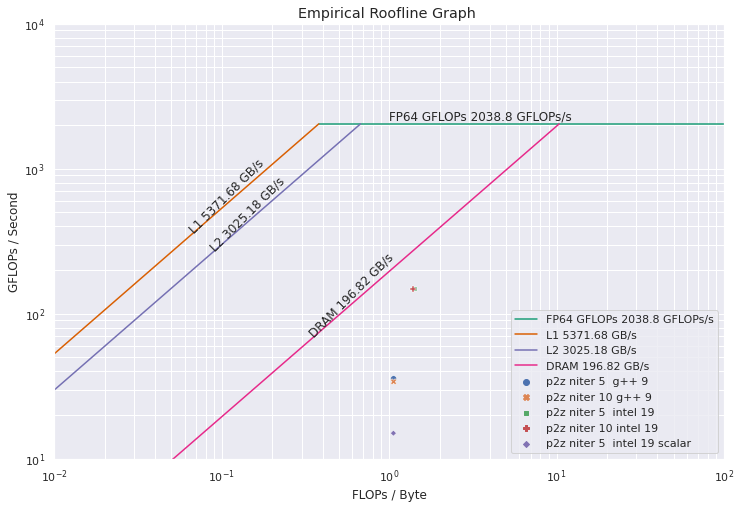

In [24]:
# calculate the axes scale
xmin =   0.01
xmax = 100.00
ymin = 10 # default - change this?
ymin = 10 ** int(math.floor(math.log10(g_df['slope'][0]*xmin)))
ymax = ymin ** int(math.floor(math.log10(g_df['slope'][0]*10)))

#calculate the midpoints for labels
xmid = math.sqrt(xmin * xmax)
ymid = g_df['slope'][0] * xmid
y0gbytes = ymid
x0gbytes = y0gbytes/g_df['slope'][0]
alpha = 1.065

# general plot settings
title = "Empirical Roofline Graph "
sns.set(rc={'figure.figsize':(12,8)})
palette = sns.color_palette( "Dark2", int(len(g_df)/2))

# plot the lines
ax = sns.lineplot(data=g_df, x="x", y="y", hue="label",palette=palette)
ax.set(xlabel='FLOPs / Byte', ylabel='GFLOPs / Second')
ax.set(xscale="log", yscale="log", xlim=(xmin, xmax), ylim=(ymin,ymax))

# plot the line label(s)
ax.text(x0gbytes, y0gbytes*alpha, g_df['label'][0], size='medium')
for index in range(len(gbytes_df.name.unique())):
  mem = gbytes_df['name'][index]
  (xmax, slope) = max([(gbytes_df['x'][i],gbytes_df['slope'][i]) for i in range(len(gbytes_df['x'])) if gbytes_df['name'][i]==mem])
  xmid = math.sqrt(xmin * xmax)
  ymid = slope * xmid
  y0gbytes = ymid
  x0gbytes = y0gbytes/slope
  alpha = 1.1
  #angle = math.degrees(math.atan(slope))/2
  ax.text(x0gbytes, y0gbytes*alpha, gbytes_df['label'][index], size='medium', rotation=45)

# plot the application information
sns.scatterplot(x=app_df['arithmetic intensity'], y=app_df['gflops/sec'], style=app_df['label'], hue=app_df['label'])

ax.grid(b=True, which='both',)
ax.set_title(title, size='large')
ax.legend(loc="lower right")

plt.show()

### Plotly Version (Work in Progress)

In [19]:
# plot! plotly version
fig = go.Figure()
elements = g_df['name'].unique()
fig.update_xaxes(type="log", range=[-1,2]) 
fig.update_yaxes(type="log", range=[1,4])
# Create traces
for cur_name in elements:
  index = (g_df[g_df['name']==cur_name].index.values)[0]
  x_vals = [g_df['x'][i] for i in range(g_df.shape[0]) if g_df['name'][i] == cur_name]
  y_vals = [g_df['y'][i] for i in range(g_df.shape[0]) if g_df['name'][i] == cur_name]
  fig.add_trace(go.Scatter(x=x_vals, y=y_vals,
                      mode="lines",
                      name=g_df['label'][index]
                      ))
  slope = g_df['slope'][index]
  # get the mid-ish point to add the label
  #calculate the midpoints for labels
  xmid = math.sqrt(xmin * xmax)
  ymid = slope * xmid
  y0gbytes = ymid
  x0gbytes = y0gbytes/slope
  fig.add_annotation(text=cur_name+str(slope),
                  xref="paper", yref="paper",
                  x=x0gbytes, y=y0gbytes, showarrow=False,
                  textangle=-45)
fig.update_layout(
    autosize=False,
    width=1200,
    height=800,
    title="Empirical Roofline Graph",
    xaxis_title="FLOPs / Byte",
    yaxis_title="GFLOPs / Second"
)
fig.show()